In [ ]:
"""
`bonferroni` : one-step correction
`sidak` : one-step correction
`holm-sidak` : step down method using Sidak adjustments
`holm` : step-down method using Bonferroni adjustments
`simes-hochberg` : step-up method  (independent)
`hommel` : closed method based on Simes tests (non-negative)
`fdr_bh` : Benjamini/Hochberg  (non-negative)
`fdr_by` : Benjamini/Yekutieli (negative)
`fdr_tsbh` : two stage fdr correction (non-negative)
`fdr_tsbky` : two stage fdr correction (non-negative)
"""

In [15]:
import statsmodels.api as sa
import statsmodels.formula.api as sfa
import scipy.stats as ss
import scikit_posthocs as sp
import pandas as pd
import numpy as np
import seaborn as sns
import os, sys

In [266]:
print("Current working dir : %s" % os.getcwd())

Current working dir : C:\Users\1\Downloads


In [19]:
coloc = pd.read_csv('~/coloc.csv')

In [20]:
coloc.head()

,probe,Rval,tM1,tM2,bTau,Rs
0,p07,0.68,0.899,0.936,0.6028,0.776807
1,p07,0.89,0.975,1.000,0.7802,0.914970
2,p07,0.74,0.922,0.867,0.7680,0.912862
3,p07,0.69,0.886,0.889,0.5560,0.731622
4,p07,0.54,0.870,0.876,0.4581,0.625792


In [21]:
coloc.groupby('probe').aggregate({'bTau' : 'mean'})

,bTau
probe,
p07,0.596620
p09,0.635982
p12,0.610633
p15,0.487021
p18,0.533589
p21,0.634888
p25,0.632750
p27,0.700225
p28,0.735267


In [22]:
df = coloc

In [23]:
df.head()

,probe,Rval,tM1,tM2,bTau,Rs
0,p07,0.68,0.899,0.936,0.6028,0.776807
1,p07,0.89,0.975,1.000,0.7802,0.914970
2,p07,0.74,0.922,0.867,0.7680,0.912862
3,p07,0.69,0.886,0.889,0.5560,0.731622
4,p07,0.54,0.870,0.876,0.4581,0.625792


In [24]:
# https://github.com/maximtrp/scikit-posthocs

In [25]:
lm = sfa.ols('bTau ~ C(probe)', data=df).fit()
anova = sa.stats.anova_lm(lm)
print(anova)

            df    sum_sq   mean_sq         F    PR(>F)
C(probe)   8.0  0.493564  0.061696  5.133686  0.000031
Residual  85.0  1.021512  0.012018       NaN       NaN


In [28]:
sp.posthoc_ttest(df, val_col='bTau', group_col='probe', p_adjust='holm')

,p07,p09,p12,p15,p18,p21,p25,p27,p28
p07,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.825684
p09,1.000000,-1.000000,1.000000,0.326754,0.896146,1.000000,1.000000,1.000000,1.000000
p12,1.000000,1.000000,-1.000000,0.813590,1.000000,1.000000,1.000000,1.000000,0.504285
p15,1.000000,0.326754,0.813590,-1.000000,1.000000,0.033698,0.461617,0.026880,0.005061
p18,1.000000,0.896146,1.000000,1.000000,-1.000000,0.073531,0.504285,0.006265,0.002706
p21,1.000000,1.000000,1.000000,0.033698,0.073531,-1.000000,1.000000,1.000000,0.316418
p25,1.000000,1.000000,1.000000,0.461617,0.504285,1.000000,-1.000000,1.000000,1.000000
p27,1.000000,1.000000,1.000000,0.026880,0.006265,1.000000,1.000000,-1.000000,1.000000
p28,0.825684,1.000000,0.504285,0.005061,0.002706,0.316418,1.000000,1.000000,-1.000000


In [29]:
data = [df.loc[ids, 'bTau'].values for ids in df.groupby('probe').groups.values()]
H, p = ss.kruskal(*data)
p

0.00012059509064468714

In [32]:
sp.posthoc_conover(df, val_col='bTau', group_col='probe', p_adjust = 'holm')

,p07,p09,p12,p15,p18,p21,p25,p27,p28
p07,-1.000000,1.000000,1.000000,0.538290,0.918789,1.000000,1.000000,0.972648,0.224214
p09,1.000000,-1.000000,1.000000,0.068986,0.195367,1.000000,1.000000,1.000000,0.878337
p12,1.000000,1.000000,-1.000000,0.452359,0.792575,1.000000,1.000000,1.000000,0.381805
p15,0.538290,0.068986,0.452359,-1.000000,1.000000,0.048477,0.178143,0.001991,0.000066
p18,0.918789,0.195367,0.792575,1.000000,-1.000000,0.178143,0.357057,0.008914,0.000539
p21,1.000000,1.000000,1.000000,0.048477,0.178143,-1.000000,1.000000,1.000000,0.452906
p25,1.000000,1.000000,1.000000,0.178143,0.357057,1.000000,-1.000000,1.000000,0.972648
p27,0.972648,1.000000,1.000000,0.001991,0.008914,1.000000,1.000000,-1.000000,1.000000
p28,0.224214,0.878337,0.381805,0.000066,0.000539,0.452906,0.972648,1.000000,-1.000000


In [40]:
sp.posthoc_conover(df, val_col='bTau', group_col='probe', p_adjust = 'bonferroni')

,p07,p09,p12,p15,p18,p21,p25,p27,p28
p07,-1.000000,1.000000,1.000000,0.880839,1.000000,1.000000,1.000000,1.000000,0.298952
p09,1.000000,-1.000000,1.000000,0.080113,0.251186,1.000000,1.000000,1.000000,1.000000
p12,1.000000,1.000000,-1.000000,0.678538,1.000000,1.000000,1.000000,1.000000,0.549799
p15,0.880839,0.080113,0.678538,-1.000000,1.000000,0.054537,0.213772,0.002108,0.000066
p18,1.000000,0.251186,1.000000,1.000000,-1.000000,0.220066,0.494386,0.009725,0.000554
p21,1.000000,1.000000,1.000000,0.054537,0.220066,-1.000000,1.000000,1.000000,0.708897
p25,1.000000,1.000000,1.000000,0.213772,0.494386,1.000000,-1.000000,1.000000,1.000000
p27,1.000000,1.000000,1.000000,0.002108,0.009725,1.000000,1.000000,-1.000000,1.000000
p28,0.298952,1.000000,0.549799,0.000066,0.000554,0.708897,1.000000,1.000000,-1.000000


In [241]:
# color variant 1
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}

In [254]:
# color variant 2
cmap = ['1', '#fb6a4a',  '#08306b',  '#4292c6', '#c6dbef']
heatmap_args = {'cmap': cmap, 'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}

(<matplotlib.axes._subplots.AxesSubplot at 0x21608a16a58>,
 <matplotlib.colorbar.ColorbarBase at 0x21608a907f0>)

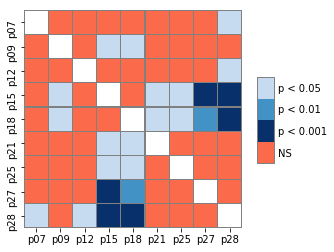

In [255]:
pc = sp.posthoc_conover(df, val_col='bTau', group_col='probe', p_adjust='fdr_bh')
sp.sign_plot(pc, **heatmap_args)

(<matplotlib.axes._subplots.AxesSubplot at 0x21608b550f0>,
 <matplotlib.colorbar.ColorbarBase at 0x21608bc6e10>)

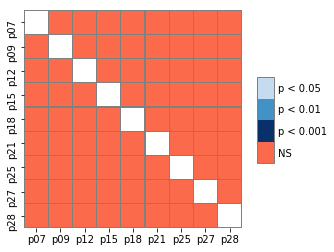

In [257]:
pc = sp.posthoc_conover(df, val_col='Rval', group_col='probe', p_adjust='fdr_bh')
sp.sign_plot(pc, **heatmap_args)

(<matplotlib.axes._subplots.AxesSubplot at 0x21608beeac8>,
 <matplotlib.colorbar.ColorbarBase at 0x21609c36940>)

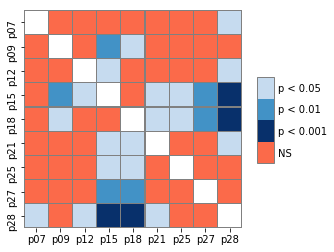

In [258]:
pc = sp.posthoc_conover(df, val_col='Rs', group_col='probe', p_adjust='fdr_bh')
sp.sign_plot(pc, **heatmap_args)

(<matplotlib.axes._subplots.AxesSubplot at 0x21609c5c6d8>,
 <matplotlib.colorbar.ColorbarBase at 0x21609cd8470>)

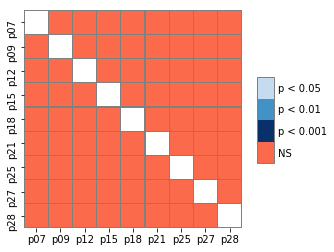

In [259]:
pc = sp.posthoc_conover(df, val_col='tM1', group_col='probe', p_adjust='fdr_bh')
sp.sign_plot(pc, **heatmap_args)

(<matplotlib.axes._subplots.AxesSubplot at 0x21609cfb278>,
 <matplotlib.colorbar.ColorbarBase at 0x21609d6ef60>)

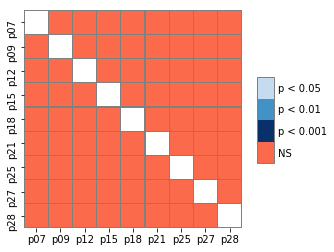

In [260]:
pc = sp.posthoc_conover(df, val_col='tM2', group_col='probe', p_adjust='fdr_bh')
sp.sign_plot(pc, **heatmap_args)

(<matplotlib.axes._subplots.AxesSubplot at 0x21609d93cc0>,
 <matplotlib.colorbar.ColorbarBase at 0x21609e03b00>)

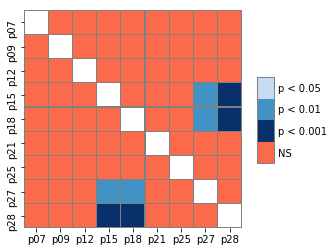

In [261]:
pc = sp.posthoc_conover(df, val_col='bTau', group_col='probe', p_adjust = 'bonferroni')
sp.sign_plot(pc, **heatmap_args)

(<matplotlib.axes._subplots.AxesSubplot at 0x21609e2b7f0>,
 <matplotlib.colorbar.ColorbarBase at 0x21609ea7588>)

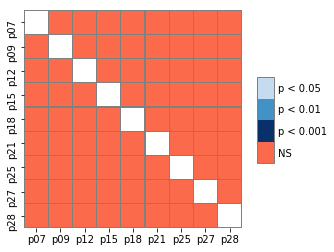

In [262]:
pc = sp.posthoc_conover(df, val_col='Rval', group_col='probe', p_adjust = 'bonferroni')
sp.sign_plot(pc, **heatmap_args)

(<matplotlib.axes._subplots.AxesSubplot at 0x21609eca390>,
 <matplotlib.colorbar.ColorbarBase at 0x21609f450b8>)

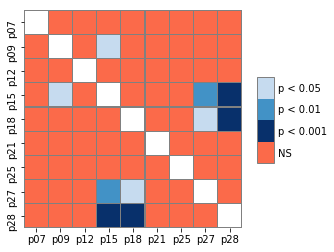

In [263]:
pc = sp.posthoc_conover(df, val_col='Rs', group_col='probe', p_adjust = 'bonferroni')
sp.sign_plot(pc, **heatmap_args)

(<matplotlib.axes._subplots.AxesSubplot at 0x21609f60e10>,
 <matplotlib.colorbar.ColorbarBase at 0x21609fddba8>)

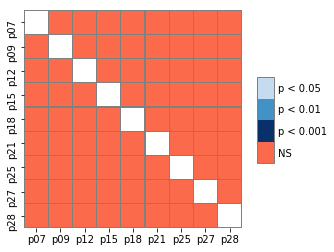

In [264]:
pc = sp.posthoc_conover(df, val_col='tM1', group_col='probe', p_adjust = 'bonferroni')
sp.sign_plot(pc, **heatmap_args)

(<matplotlib.axes._subplots.AxesSubplot at 0x2160a001978>,
 <matplotlib.colorbar.ColorbarBase at 0x2160a07b6d8>)

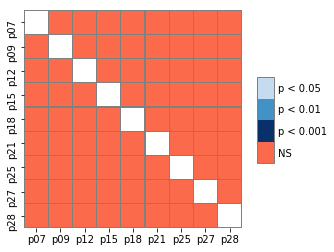

In [265]:
pc = sp.posthoc_conover(df, val_col='tM2', group_col='probe', p_adjust = 'bonferroni')
sp.sign_plot(pc, **heatmap_args)

In [429]:
tmrm = pd.read_csv('~/Book333.csv')

In [312]:
tmrm = pd.read_csv('~/Book333-cont.csv')

In [430]:
tmrm.head()

,TMRM,substance
0,274.1,-Ctrl
1,537.1,-Ctrl
2,274.3,-Ctrl
3,307.9,-Ctrl
4,305.0,-Ctrl


In [431]:
tmrm.groupby('substance').aggregate({'TMRM' : 'mean'})

,TMRM
substance,
-Ctrl,3.549083e+02
Ctrl_DMEM,8.508598e+05
Ctrl_PBS,9.087619e+05
N_0.1%,1.044207e+06
N_1%,1.017992e+06
N_10%,9.627677e+05
U_1%,6.877132e+05
U_10%,7.390095e+05


In [499]:
df = tmrm

In [433]:
lm = sfa.ols('TMRM ~ C(substance)', data=df).fit()
anova = sa.stats.anova_lm(lm)
print(anova)

                df        sum_sq       mean_sq          F        PR(>F)
C(substance)   7.0  8.929269e+12  1.275610e+12  42.286247  3.533564e-22
Residual      67.0  2.021127e+12  3.016607e+10        NaN           NaN


In [434]:
sp.posthoc_ttest(df, val_col='TMRM', group_col='substance', p_adjust='holm')

,-Ctrl,Ctrl_DMEM,Ctrl_PBS,N_0.1%,N_1%,N_10%,U_1%,U_10%
-Ctrl,-1.000000e+00,1.081572e-09,4.984032e-08,2.220297e-09,3.249656e-15,4.336674e-17,8.331541e-22,6.525932e-25
Ctrl_DMEM,1.081572e-09,-1.000000e+00,1.000000e+00,1.000000e+00,8.554789e-01,1.000000e+00,6.217659e-01,1.000000e+00
Ctrl_PBS,4.984032e-08,1.000000e+00,-1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,6.217659e-01,1.000000e+00
N_0.1%,2.220297e-09,1.000000e+00,1.000000e+00,-1.000000e+00,1.000000e+00,1.000000e+00,3.348093e-02,9.393813e-02
N_1%,3.249656e-15,8.554789e-01,1.000000e+00,1.000000e+00,-1.000000e+00,1.000000e+00,4.229287e-05,2.288756e-04
N_10%,4.336674e-17,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,1.715499e-05,1.326949e-04
U_1%,8.331541e-22,6.217659e-01,6.217659e-01,3.348093e-02,4.229287e-05,1.715499e-05,-1.000000e+00,9.516961e-02
U_10%,6.525932e-25,1.000000e+00,1.000000e+00,9.393813e-02,2.288756e-04,1.326949e-04,9.516961e-02,-1.000000e+00


In [435]:
data = [df.loc[ids, 'TMRM'].values for ids in df.groupby('substance').groups.values()]
H, p = ss.kruskal(*data)
p

1.899253802016037e-07

In [436]:
sp.posthoc_conover(df, val_col='TMRM', group_col='substance', p_adjust = 'bonferroni')

,-Ctrl,Ctrl_DMEM,Ctrl_PBS,N_0.1%,N_1%,N_10%,U_1%,U_10%
-Ctrl,-1.000000e+00,0.000105,0.000005,3.637458e-08,6.036714e-10,1.432701e-08,0.160331,0.000145
Ctrl_DMEM,1.047967e-04,-1.000000,1.000000,1.000000e+00,1.908515e-01,1.000000e+00,1.000000,1.000000
Ctrl_PBS,5.042285e-06,1.000000,-1.000000,1.000000e+00,1.000000e+00,1.000000e+00,0.199591,1.000000
N_0.1%,3.637458e-08,1.000000,1.000000,-1.000000e+00,1.000000e+00,1.000000e+00,0.006053,1.000000
N_1%,6.036714e-10,0.190851,1.000000,1.000000e+00,-1.000000e+00,1.000000e+00,0.000225,0.152199
N_10%,1.432701e-08,1.000000,1.000000,1.000000e+00,1.000000e+00,-1.000000e+00,0.002945,0.964001
U_1%,1.603307e-01,1.000000,0.199591,6.053498e-03,2.253352e-04,2.944917e-03,-1.000000,1.000000
U_10%,1.453912e-04,1.000000,1.000000,1.000000e+00,1.521991e-01,9.640008e-01,1.000000,-1.000000


In [437]:
# color variant 2
cmap = ['1', '#fb6a4a',  '#08306b',  '#4292c6', '#c6dbef']
heatmap_args = {'cmap': cmap, 'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}

(<matplotlib.axes._subplots.AxesSubplot at 0x2160de4fda0>,
 <matplotlib.colorbar.ColorbarBase at 0x2160ee96a58>)

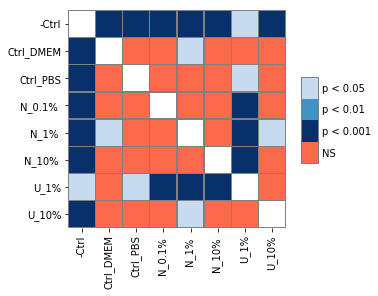

In [438]:
pc = sp.posthoc_conover(df, val_col='TMRM', group_col='substance', p_adjust='fdr_bh')
sp.sign_plot(pc, **heatmap_args)

(<matplotlib.axes._subplots.AxesSubplot at 0x21611105208>,
 <matplotlib.colorbar.ColorbarBase at 0x2161120f588>)

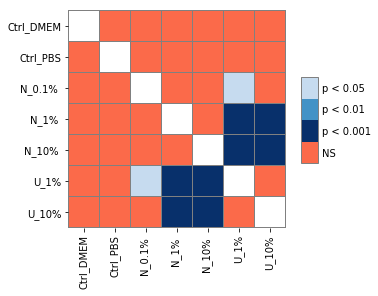

In [500]:
sp.sign_plot(sp.posthoc_ttest(df.loc[df.substance != '-Ctrl'], val_col='TMRM', 
                              group_col='substance', 
                              p_adjust='holm'), 
             **heatmap_args)

(<matplotlib.axes._subplots.AxesSubplot at 0x2160eebb080>,
 <matplotlib.colorbar.ColorbarBase at 0x2160ef2f4e0>)

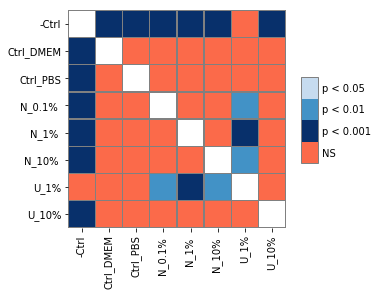

In [439]:
pc = sp.posthoc_conover(df, val_col='TMRM', group_col='substance', p_adjust='bonferroni')
sp.sign_plot(pc, **heatmap_args)

In [440]:
sp.posthoc_conover(df, val_col='TMRM', group_col='substance', p_adjust='bonferroni')

,-Ctrl,Ctrl_DMEM,Ctrl_PBS,N_0.1%,N_1%,N_10%,U_1%,U_10%
-Ctrl,-1.000000e+00,0.000105,0.000005,3.637458e-08,6.036714e-10,1.432701e-08,0.160331,0.000145
Ctrl_DMEM,1.047967e-04,-1.000000,1.000000,1.000000e+00,1.908515e-01,1.000000e+00,1.000000,1.000000
Ctrl_PBS,5.042285e-06,1.000000,-1.000000,1.000000e+00,1.000000e+00,1.000000e+00,0.199591,1.000000
N_0.1%,3.637458e-08,1.000000,1.000000,-1.000000e+00,1.000000e+00,1.000000e+00,0.006053,1.000000
N_1%,6.036714e-10,0.190851,1.000000,1.000000e+00,-1.000000e+00,1.000000e+00,0.000225,0.152199
N_10%,1.432701e-08,1.000000,1.000000,1.000000e+00,1.000000e+00,-1.000000e+00,0.002945,0.964001
U_1%,1.603307e-01,1.000000,0.199591,6.053498e-03,2.253352e-04,2.944917e-03,-1.000000,1.000000
U_10%,1.453912e-04,1.000000,1.000000,1.000000e+00,1.521991e-01,9.640008e-01,1.000000,-1.000000


c:\python37\lib\site-packages\scipy\stats\morestats.py:1680: UserWarning: approximate p-value will be computed by extrapolation
  warnings.warn("approximate p-value will be computed by extrapolation")
c:\python37\lib\site-packages\scipy\stats\morestats.py:1680: UserWarning: approximate p-value will be computed by extrapolation
  warnings.warn("approximate p-value will be computed by extrapolation")
c:\python37\lib\site-packages\scipy\stats\morestats.py:1680: UserWarning: approximate p-value will be computed by extrapolation
  warnings.warn("approximate p-value will be computed by extrapolation")
c:\python37\lib\site-packages\scipy\stats\morestats.py:1680: UserWarning: approximate p-value will be computed by extrapolation
  warnings.warn("approximate p-value will be computed by extrapolation")
c:\python37\lib\site-packages\scipy\stats\morestats.py:1680: UserWarning: approximate p-value will be computed by extrapolation
  warnings.warn("approximate p-value will be computed by extrapolati

(<matplotlib.axes._subplots.AxesSubplot at 0x2160ef57358>,
 <matplotlib.colorbar.ColorbarBase at 0x2160efc6a20>)

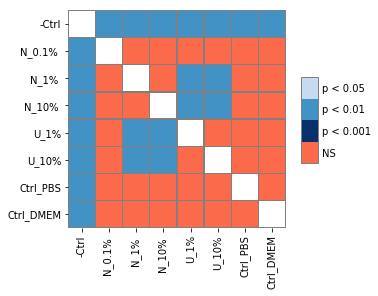

In [441]:

pc1 = sp.posthoc_anderson(df, val_col='TMRM', group_col='substance', p_adjust='bonferroni')
sp.sign_plot(pc1, **heatmap_args)

In [442]:
sp.posthoc_dunn(df, val_col='TMRM', group_col='substance', p_adjust='bonferroni')

,-Ctrl,Ctrl_DMEM,Ctrl_PBS,N_0.1%,N_1%,N_10%,U_1%,U_10%
-Ctrl,-1.000000,0.021934,0.002938,0.000077,0.000003,0.000037,1.000000,0.026995
Ctrl_DMEM,0.021934,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Ctrl_PBS,0.002938,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
N_0.1%,0.000077,1.000000,1.000000,-1.000000,1.000000,1.000000,0.256231,1.000000
N_1%,0.000003,1.000000,1.000000,1.000000,-1.000000,1.000000,0.035545,1.000000
N_10%,0.000037,1.000000,1.000000,1.000000,1.000000,-1.000000,0.168427,1.000000
U_1%,1.000000,1.000000,1.000000,0.256231,0.035545,0.168427,-1.000000,1.000000
U_10%,0.026995,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000


(<matplotlib.axes._subplots.AxesSubplot at 0x2160eff02e8>,
 <matplotlib.colorbar.ColorbarBase at 0x2160f060be0>)

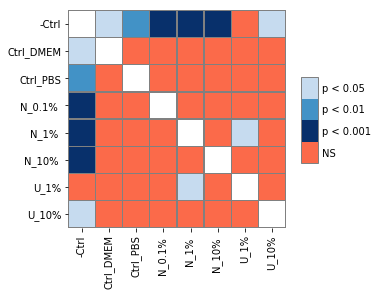

In [443]:
pc2 = sp.posthoc_dunn(df, val_col='TMRM', group_col='substance', p_adjust='bonferroni')
sp.sign_plot(pc2, **heatmap_args)

In [444]:
sp.posthoc_mannwhitney(df, val_col='TMRM', group_col='substance', p_adjust='bonferroni')

,-Ctrl,Ctrl_DMEM,Ctrl_PBS,N_0.1%,N_1%,N_10%,U_1%,U_10%
-Ctrl,-1.000000,0.004018,0.004018,0.004018,0.004018,0.004018,0.004018,0.004018
Ctrl_DMEM,0.004018,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Ctrl_PBS,0.004018,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
N_0.1%,0.004018,1.000000,1.000000,-1.000000,1.000000,1.000000,0.953937,1.000000
N_1%,0.004018,1.000000,1.000000,1.000000,-1.000000,1.000000,0.011544,0.011544
N_10%,0.004018,1.000000,1.000000,1.000000,1.000000,-1.000000,0.011544,0.011544
U_1%,0.004018,1.000000,1.000000,0.953937,0.011544,0.011544,-1.000000,0.292440
U_10%,0.004018,1.000000,1.000000,1.000000,0.011544,0.011544,0.292440,-1.000000


(<matplotlib.axes._subplots.AxesSubplot at 0x2160f08a470>,
 <matplotlib.colorbar.ColorbarBase at 0x2160f0ff048>)

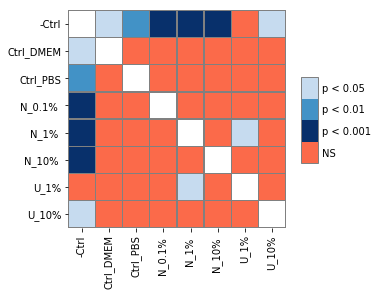

In [445]:
pc3 = sp.posthoc_dunn(df, val_col='TMRM', group_col='substance', p_adjust='bonferroni')
sp.sign_plot(pc3, **heatmap_args)

(<matplotlib.axes._subplots.AxesSubplot at 0x2160f11d358>,
 <matplotlib.colorbar.ColorbarBase at 0x2160f1990f0>)

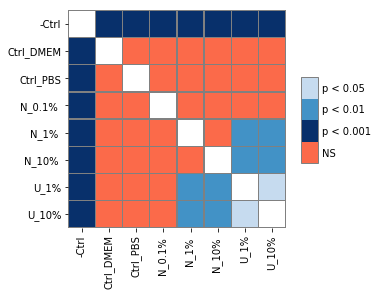

In [446]:
pc3 = sp.posthoc_mannwhitney(df, val_col='TMRM', group_col='substance', p_adjust='fdr_bh')
sp.sign_plot(pc3, **heatmap_args)

(<matplotlib.axes._subplots.AxesSubplot at 0x2160f1b4ba8>,
 <matplotlib.colorbar.ColorbarBase at 0x2160f22e588>)

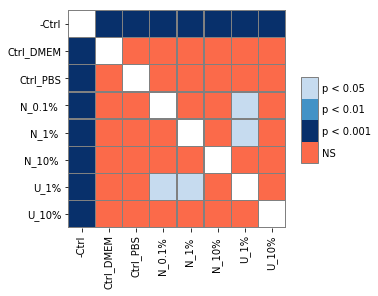

In [447]:
sp.posthoc_scheffe(df, val_col='TMRM', group_col='substance', p_adjust='fdr_bh')
pc3 = sp.posthoc_scheffe(df, val_col='TMRM', group_col='substance', p_adjust='fdr_bh')
sp.sign_plot(pc3, **heatmap_args)

(<matplotlib.axes._subplots.AxesSubplot at 0x2160f2d7828>,
 <matplotlib.colorbar.ColorbarBase at 0x2160f353588>)

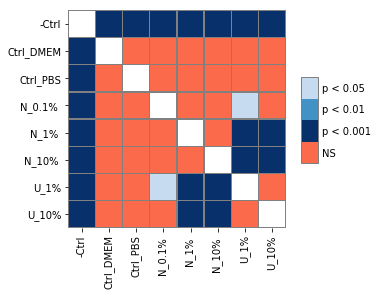

In [449]:
sp.sign_plot(sp.posthoc_ttest(df, val_col='TMRM', group_col='substance', p_adjust='holm'), **heatmap_args)

(<matplotlib.axes._subplots.AxesSubplot at 0x2160f37b160>,
 <matplotlib.colorbar.ColorbarBase at 0x2160f3e8780>)

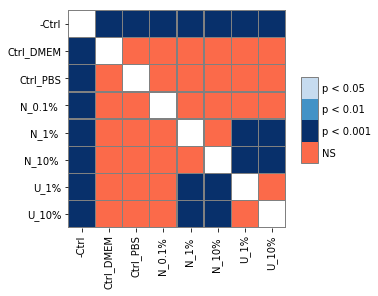

In [450]:
sp.sign_plot(sp.posthoc_ttest(df, val_col='TMRM', group_col='substance', p_adjust='bonferroni'), **heatmap_args)

In [451]:
data = [df.loc[ids, 'TMRM'].values for ids in df.groupby('substance').groups.values()]
H, p = ss.kruskal(*data)
p

1.899253802016037e-07

In [452]:
sp.sign_plot(sp.posthoc_wilcoxon(df, val_col='TMRM', group_col='substance', p_adjust=None), **heatmap_args)

ValueError: Unequal N in wilcoxon.  Aborting.

(<matplotlib.axes._subplots.AxesSubplot at 0x2160f42d710>,
 <matplotlib.colorbar.ColorbarBase at 0x2160f49ecf8>)

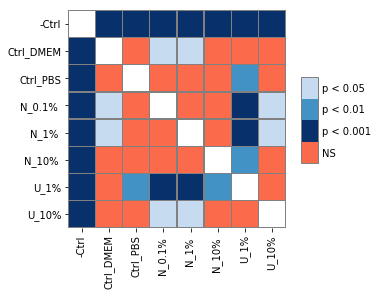

In [453]:
sp.sign_plot(sp.posthoc_vanwaerden(df, val_col='TMRM', group_col='substance', p_adjust=None), **heatmap_args)

((<matplotlib.axes._subplots.AxesSubplot at 0x2160f4c2828>,
  <matplotlib.colorbar.ColorbarBase at 0x2160f5400b8>),)

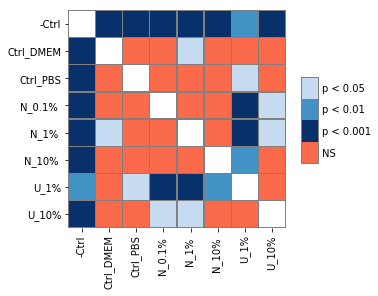

In [454]:
sp.sign_plot(sp.posthoc_vanwaerden(df, val_col='TMRM', group_col='substance', p_adjust='fdr_bh'), **heatmap_args),

((<matplotlib.axes._subplots.AxesSubplot at 0x2160f693358>,
  <matplotlib.colorbar.ColorbarBase at 0x2160f7049e8>),)

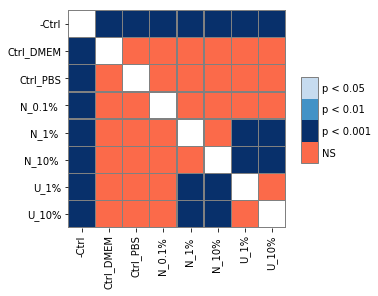

In [460]:
sp.sign_plot(sp.posthoc_ttest(df, val_col='TMRM', group_col='substance', p_adjust='bonferroni'), **heatmap_args),

((<matplotlib.axes._subplots.AxesSubplot at 0x2160f727550>,
  <matplotlib.colorbar.ColorbarBase at 0x2160f797cc0>),)

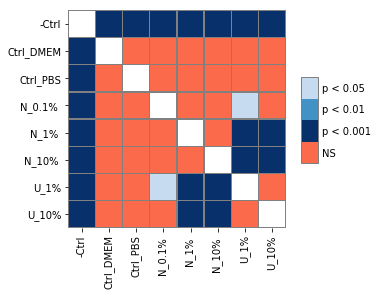

In [461]:
sp.sign_plot(sp.posthoc_ttest(df, val_col='TMRM', group_col='substance', p_adjust='simes-hochberg'), **heatmap_args),

((<matplotlib.axes._subplots.AxesSubplot at 0x2160f7bf780>,
  <matplotlib.colorbar.ColorbarBase at 0x2160f831ef0>),)

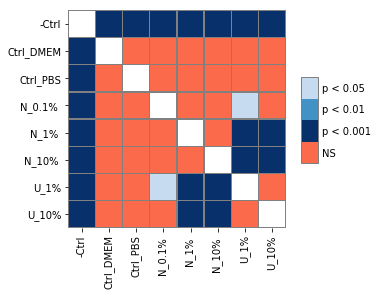

In [462]:
sp.sign_plot(sp.posthoc_ttest(df, val_col='TMRM', group_col='substance', p_adjust='hommel'), **heatmap_args),

In [487]:
sp.sign_plot(sp.posthoc_ttest(df, val_col='TMRM', group_col='substance', p_adjust='fdr_tsbky'), **heatmap_args),

KeyError: 'TMRM'

In [470]:
mtt = pd.read_csv('~/mtt.csv')

In [481]:
df = mtt

(<matplotlib.axes._subplots.AxesSubplot at 0x21610d33828>,
 <matplotlib.colorbar.ColorbarBase at 0x21610da48d0>)

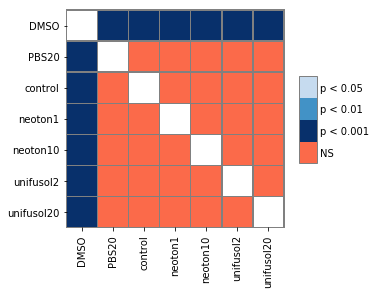

In [488]:
sp.sign_plot(sp.posthoc_ttest(df, val_col='MTT', group_col='substance', p_adjust=None), **heatmap_args)

In [485]:
lm = sfa.ols('MTT ~ C(substance)', data=df).fit()
anova = sa.stats.anova_lm(lm)
print(anova)

                df    sum_sq   mean_sq          F        PR(>F)
C(substance)   6.0  3.386560  0.564427  20.548814  3.828794e-10
Residual      35.0  0.961366  0.027468        NaN           NaN


In [484]:
data = [df.loc[ids, 'MTT'].values for ids in df.groupby('substance').groups.values()]
H, p = ss.kruskal(*data)
p

0.010256593661381552

In [483]:
sp.posthoc_ttest(df, val_col='MTT', group_col='substance', p_adjust='holm')

,DMSO,PBS20,control,neoton1,neoton10,unifusol2,unifusol20
DMSO,-1.000000e+00,1.402381e-07,0.000167,3.919752e-10,7.428527e-10,6.033646e-07,0.001457
PBS20,1.402381e-07,-1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000
control,1.667002e-04,1.000000e+00,-1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000
neoton1,3.919752e-10,1.000000e+00,1.000000,-1.000000e+00,1.000000e+00,1.000000e+00,1.000000
neoton10,7.428527e-10,1.000000e+00,1.000000,1.000000e+00,-1.000000e+00,1.000000e+00,1.000000
unifusol2,6.033646e-07,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,-1.000000e+00,1.000000
unifusol20,1.457134e-03,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,-1.000000


(<matplotlib.axes._subplots.AxesSubplot at 0x21610dca160>,
 <matplotlib.colorbar.ColorbarBase at 0x21610e3b208>)

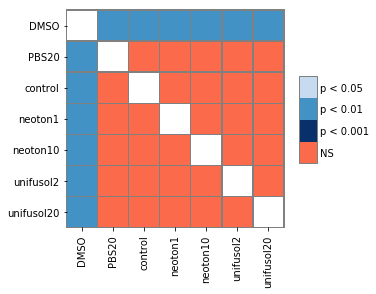

In [489]:
sp.sign_plot(sp.posthoc_vanwaerden(df, val_col='MTT', group_col='substance', p_adjust='fdr_bh'), **heatmap_args)

c:\python37\lib\site-packages\scipy\stats\morestats.py:2388: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
c:\python37\lib\site-packages\scipy\stats\morestats.py:2388: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
c:\python37\lib\site-packages\scipy\stats\morestats.py:2388: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
c:\python37\lib\site-packages\scipy\stats\morestats.py:2388: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
c:\python37\lib\site-packages\scipy\stats\morestats.py:2388: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too

(<matplotlib.axes._subplots.AxesSubplot at 0x21610e5b5c0>,
 <matplotlib.colorbar.ColorbarBase at 0x21610ec7a90>)

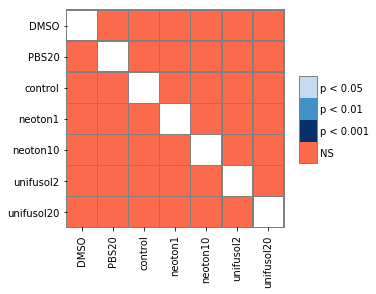

In [490]:
sp.sign_plot(sp.posthoc_wilcoxon(df, val_col='MTT', group_col='substance', p_adjust='fdr_bh'), **heatmap_args)

In [491]:
data = [df.loc[ids, 'MTT'].values for ids in df.groupby('substance').groups.values()]
H, p = ss.kruskal(*data)
p

0.010256593661381552

(<matplotlib.axes._subplots.AxesSubplot at 0x21610edaa58>,
 <matplotlib.colorbar.ColorbarBase at 0x21610f3a9e8>)

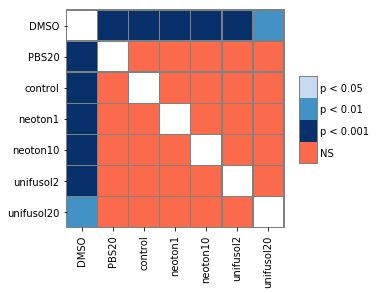

In [492]:

sp.sign_plot(sp.posthoc_ttest(df, val_col='MTT', group_col='substance', p_adjust='holm'), **heatmap_args)

(<matplotlib.axes._subplots.AxesSubplot at 0x21611105240>,
 <matplotlib.colorbar.ColorbarBase at 0x21611178da0>)

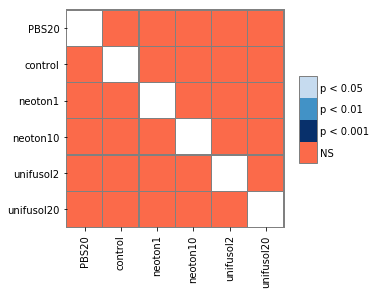

In [498]:
sp.sign_plot(sp.posthoc_ttest(df.loc[df.substance != 'DMSO'], val_col='MTT', 
                              group_col='substance', 
                              p_adjust='holm'), 
             **heatmap_args)

In [496]:
df.loc[df.substance != 'DMSO']

,MTT,substance
6,1.119,control
7,1.008,control
8,0.782,control
9,0.652,control
10,0.632,control
11,0.563,control
12,0.880,neoton1
13,0.950,neoton1
14,0.848,neoton1
15,0.803,neoton1


In [505]:
sp.sign_plot(sp.posthoc_ttest(df.loc[df.substance != 'DMSO'], val_col='MTT', 
                              group_col='substance', 
                              p_adjust='holm'), 
             **heatmap_args)

KeyError: 'MTT'